In [1]:
import pandas as pd
import re

In [11]:
genres_df = pd.read_csv("../data/train/genres.tsv", sep="\t")
genres_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15933 entries, 0 to 15932
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   item    15933 non-null  int64 
 1   genre   15933 non-null  object
dtypes: int64(1), object(1)
memory usage: 249.1+ KB


In [12]:
directors_df = pd.read_csv("../data/train/directors.tsv", sep="\t")
directors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5905 entries, 0 to 5904
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   item      5905 non-null   int64 
 1   director  5905 non-null   object
dtypes: int64(1), object(1)
memory usage: 92.4+ KB


In [13]:
titles_df = pd.read_csv('../data/train/titles.tsv',sep='\t')
titles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6807 entries, 0 to 6806
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   item    6807 non-null   int64 
 1   title   6807 non-null   object
dtypes: int64(1), object(1)
memory usage: 106.5+ KB


In [14]:
years_df = pd.read_csv('../data/train/years.tsv',sep='\t')
years_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6799 entries, 0 to 6798
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   item    6799 non-null   int64
 1   year    6799 non-null   int64
dtypes: int64(2)
memory usage: 106.4 KB


In [15]:
writers_df = pd.read_csv('../data/train/writers.tsv',sep='\t')
writers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11306 entries, 0 to 11305
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   item    11306 non-null  int64 
 1   writer  11306 non-null  object
dtypes: int64(1), object(1)
memory usage: 176.8+ KB


In [16]:
non_numeric_titles = [
    title for title in titles_df['title']
    if re.search(r'\((.*[^\d].*)\)', title)  # 숫자만으로 이루어지지 않은 내용을 찾음
]

# 결과 출력
print(non_numeric_titles)

['Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)', 'Seven (a.k.a. Se7en) (1995)', "Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)", 'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)', 'City of God (Cidade de Deus) (2002)', 'Léon: The Professional (a.k.a. The Professional) (Léon) (1994)', 'Crouching Tiger, Hidden Dragon (Wo hu cang long) (2000)', 'Ghostbusters (a.k.a. Ghost Busters) (1984)', "Pan's Labyrinth (Laberinto del fauno, El) (2006)", 'Spirited Away (Sen to Chihiro no kamikakushi) (2001)', 'Life Is Beautiful (La Vita è bella) (1997)', "Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001)", 'Run Lola Run (Lola rennt) (1998)', 'Good, the Bad and the Ugly, The (Buono, il brutto, il cattivo, Il) (1966)', 'Dumb & Dumber (Dumb and Dumber) (1994)', 'Lives of Others, The (Das leben der Anderen) (2006)', 'Princess Mononoke (Mononoke-hime) (1997)', "Howl's Moving Castle (Hauru no ugoku shiro) (2004)", 'Seven Samurai 

In [17]:
# 50912 앤솔로지 영화

In [18]:
import matplotlib.pyplot as plt

In [19]:
item_writer = writers_df.groupby('item')['writer'].apply(list).reset_index()

In [20]:
item_director = directors_df.groupby('item')['director'].apply(list).reset_index()

In [21]:
item_genre = genres_df.groupby('item')['genre'].apply(list).reset_index()

In [22]:
train = pd.read_csv('../data/train/train_ratings.csv')

In [23]:
train

,user,item,time
0,11,4643,1230782529
1,11,170,1230782534
2,11,531,1230782539
3,11,616,1230782542
4,11,2140,1230782563
...,...,...,...
5154466,138493,44022,1260209449
5154467,138493,4958,1260209482
5154468,138493,68319,1260209720
5154469,138493,40819,1260209726


In [24]:
import time

In [25]:
unix_time = 1230782529 # some random timestamp from dataset
converted_time = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(unix_time))

In [26]:
train['time']= train['time'].apply(
    lambda x: time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(x))
)

In [27]:
df = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(train,titles_df,on='item',how='left'),years_df,on='item',how='left'),item_genre,on='item',how='left'),item_director,on='item',how='left'),item_writer,on='item',how='left')

In [28]:
train['user'].value_counts()

user
8405      2912
54465     1980
24219     1842
32514     1830
91349     1795
          ... 
11211       32
128756      28
105578      22
68606       19
53188       16
Name: count, Length: 31360, dtype: int64

(array([2.7635e+04, 3.0300e+03, 5.1900e+02, 1.2000e+02, 3.3000e+01,
        1.6000e+01, 6.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  16. ,  305.6,  595.2,  884.8, 1174.4, 1464. , 1753.6, 2043.2,
        2332.8, 2622.4, 2912. ]),
 <BarContainer object of 10 artists>)

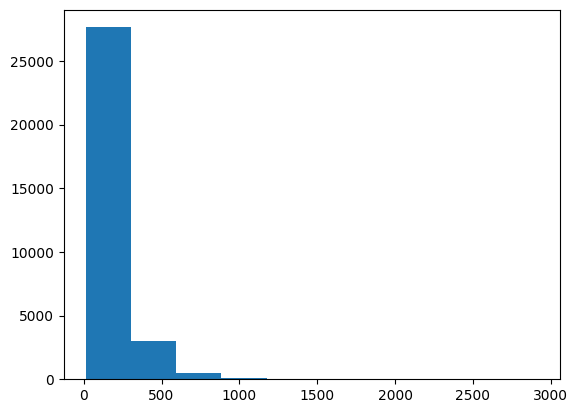

In [29]:
plt.hist(train['user'].value_counts().values)

In [30]:
df[df['user']==8405]

,user,item,time,title,year,genre,director,writer
315136,8405,1252,2006-10-10 06:41:32,Chinatown (1974),1974.0,"[Crime, Film-Noir, Mystery, Thriller]",[nm0000591],"[nm0000591, nm0001801]"
315137,8405,1278,2006-10-10 06:41:44,Young Frankenstein (1974),1974.0,"[Comedy, Fantasy]",[nm0000316],"[nm0000316, nm0000698, nm0791217]"
315138,8405,2599,2006-10-10 06:43:40,Election (1999),1999.0,[Comedy],[nm0668247],"[nm0668247, nm0674909, nm0852591]"
315139,8405,3408,2006-10-10 06:44:18,Erin Brockovich (2000),2000.0,[Drama],[nm0001752],[nm0335666]
315140,8405,2268,2006-10-10 06:44:58,"Few Good Men, A (1992)",1992.0,"[Crime, Drama, Thriller]",[nm0001661],[nm0815070]
...,...,...,...,...,...,...,...,...
318043,8405,1967,2012-05-07 03:14:10,Labyrinth (1986),1986.0,"[Adventure, Fantasy, Musical]",[nm0001345],"[nm0001345, nm0001402]"
318044,8405,2966,2012-08-05 06:08:58,"Straight Story, The (1999)",1999.0,"[Adventure, Drama]",[nm0000186],NaN
318045,8405,356,2012-08-06 02:33:42,Forrest Gump (1994),1994.0,"[Comedy, Drama, Romance, War]",[nm0000709],[nm0744839]
318046,8405,69685,2013-01-28 06:49:20,Daria: Is It College Yet? (2002),2002.0,"[Animation, Comedy]",[nm0228327],"[nm0251550, nm0630437]"


In [31]:
data = pd.to_datetime(df['time'])

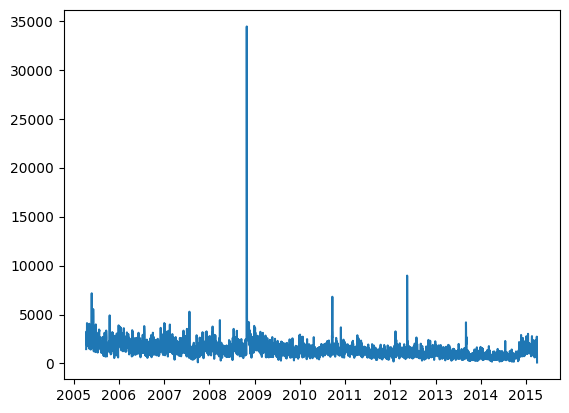

In [32]:

plt.plot(data.dt.date.value_counts().sort_index())

In [33]:
test = pd.merge(train,genres_df,on='item',how='left')

In [34]:
a = pd.DataFrame(test['genre'].value_counts())

In [35]:
b = pd.DataFrame(genres_df['genre'].value_counts())

In [36]:
a['t'] =b['count']
a['r'] = a['count']/ a['t']

In [37]:
top10_movie = train['item'].value_counts()[:10].index

In [38]:
titles_df[titles_df['item'].isin(top10_movie)]

,item,title
0,318,"Shawshank Redemption, The (1994)"
1,2571,"Matrix, The (1999)"
2,2959,Fight Club (1999)
3,296,Pulp Fiction (1994)
4,356,Forrest Gump (1994)
5,4993,"Lord of the Rings: The Fellowship of the Ring,..."
6,7153,"Lord of the Rings: The Return of the King, The..."
7,5952,"Lord of the Rings: The Two Towers, The (2002)"
8,593,"Silence of the Lambs, The (1991)"
9,2858,American Beauty (1999)


In [39]:
non_numeric_titles = [
    title for title in titles_df['title']
    if re.search(r'\((.*[^\d].*)\)', title)  # 숫자만으로 이루어지지 않은 내용을 찾음
]

# 결과 출력
print(non_numeric_titles)

['Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)', 'Seven (a.k.a. Se7en) (1995)', "Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)", 'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)', 'City of God (Cidade de Deus) (2002)', 'Léon: The Professional (a.k.a. The Professional) (Léon) (1994)', 'Crouching Tiger, Hidden Dragon (Wo hu cang long) (2000)', 'Ghostbusters (a.k.a. Ghost Busters) (1984)', "Pan's Labyrinth (Laberinto del fauno, El) (2006)", 'Spirited Away (Sen to Chihiro no kamikakushi) (2001)', 'Life Is Beautiful (La Vita è bella) (1997)', "Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001)", 'Run Lola Run (Lola rennt) (1998)', 'Good, the Bad and the Ugly, The (Buono, il brutto, il cattivo, Il) (1966)', 'Dumb & Dumber (Dumb and Dumber) (1994)', 'Lives of Others, The (Das leben der Anderen) (2006)', 'Princess Mononoke (Mononoke-hime) (1997)', "Howl's Moving Castle (Hauru no ugoku shiro) (2004)", 'Seven Samurai 

In [40]:
matches = [item for item in non_numeric_titles if re.fullmatch(".*\(\d+\)", item)]

In [41]:
w = [x for x in non_numeric_titles if not x in matches]

In [42]:
tmp = [re.sub(r'\s*\(\d{4}\)$', '', i) for i in matches]

In [43]:
import torch

In [44]:
from transformers import AutoTokenizer, AutoModel

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [45]:

def text_to_vector(text, tokenizer, model):
    # 텍스트를 토크나이징하고 텐서로 변환
    tokenized = tokenizer(
        text,
        max_length=512,  # 최대 길이는 512로 설정
        padding='max_length',  # 패딩 추가
        truncation=True,  # 텍스트가 길면 자르기
        return_tensors='pt'  # PyTorch 텐서 반환
    ).to(model.device)  # 모델이 있는 디바이스로 이동
    
    # 모델의 출력 계산 (배치 크기가 1일 경우)
    with torch.no_grad():
        outputs = model(**tokenized)
        # BERT 계열 모델은 [CLS] 토큰에 해당하는 첫 번째 벡터를 사용
        # 다른 모델에서는 [CLS]에 해당하는 첫 번째 토큰을 선택
        # outputs에 따라 다를 수 있으므로 모델의 종류에 맞게 처리
        if isinstance(outputs, tuple):
            # 일부 모델은 (logits, hidden states) 형태로 출력되므로
            # hidden states만 사용
            last_hidden_state = outputs[0]
        else:
            last_hidden_state = outputs.last_hidden_state
        
        # [CLS] 토큰은 첫 번째 위치에 있으므로 첫 번째 벡터를 선택
        sentence_embedding = last_hidden_state[:, 0, :]
    
    # 결과 벡터 반환
    return sentence_embedding.squeeze(0).cpu().detach().numpy()

In [46]:
model_name = 'nlptown/bert-base-multilingual-uncased-sentiment'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name).to('cuda')  # GPU로 모델 이동

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [48]:
import numpy as np

In [49]:
t1 = 'Sen to Chihiro no kamikakushi'
t2 = 'Spirited Away'

embedding1 = text_to_vector(t1, tokenizer, model)
embedding2 = text_to_vector(t2, tokenizer, model)
embedding1.dot(embedding2) / np.linalg.norm(embedding1) / np.linalg.norm(embedding2)

0.49172452